In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


In [60]:
data = pd.read_csv('diabetes.csv') 



In [61]:
data.head()  #displaying the head of dataset


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [62]:
data.describe()      #description of dataset 


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [64]:
data.shape    #768 rows and 9 columns

(768, 9)

In [65]:
data.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0            57       60             0              0        21.7  0.735                     67   0          1
             67       76             0              0        45.3  0.194                     46   0          1
5            103      108            37             0        39.2  0.305                     65   0          1
             104      74             0              0        28.8  0.153                     48   0          1
             105      72             29             325      36.9  0.159                     28   0          1
                                                                                                            ..
2            84       50             23             76       30.4  0.968                     21   0          1
             85       65             0              0        39.6  0.930                     27   0          1
      

In [66]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [67]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

***Checking Null Values***

In [68]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [69]:
data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [70]:
data.isnull().all()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [71]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

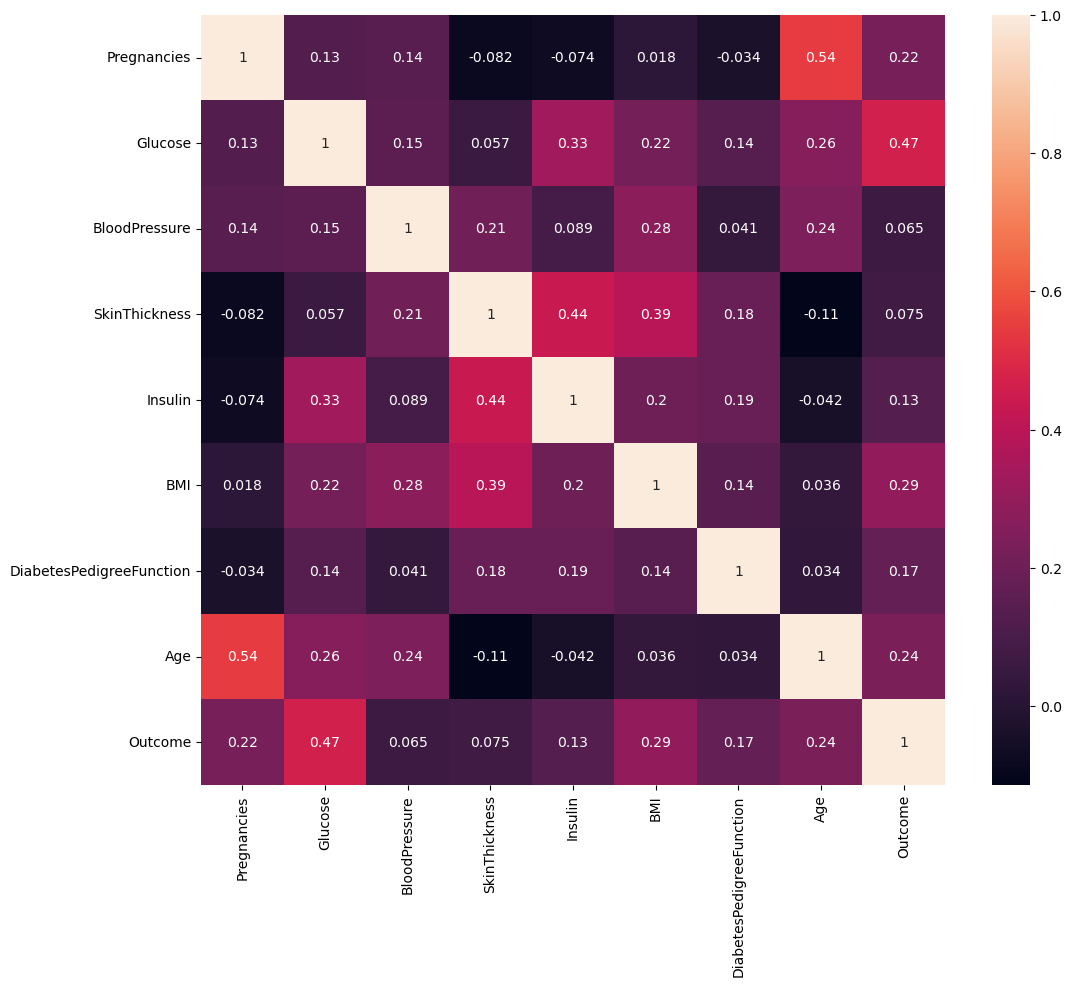

In [72]:
plt.figure(figsize = (12,10))

sns.heatmap(data.corr(), annot =True)



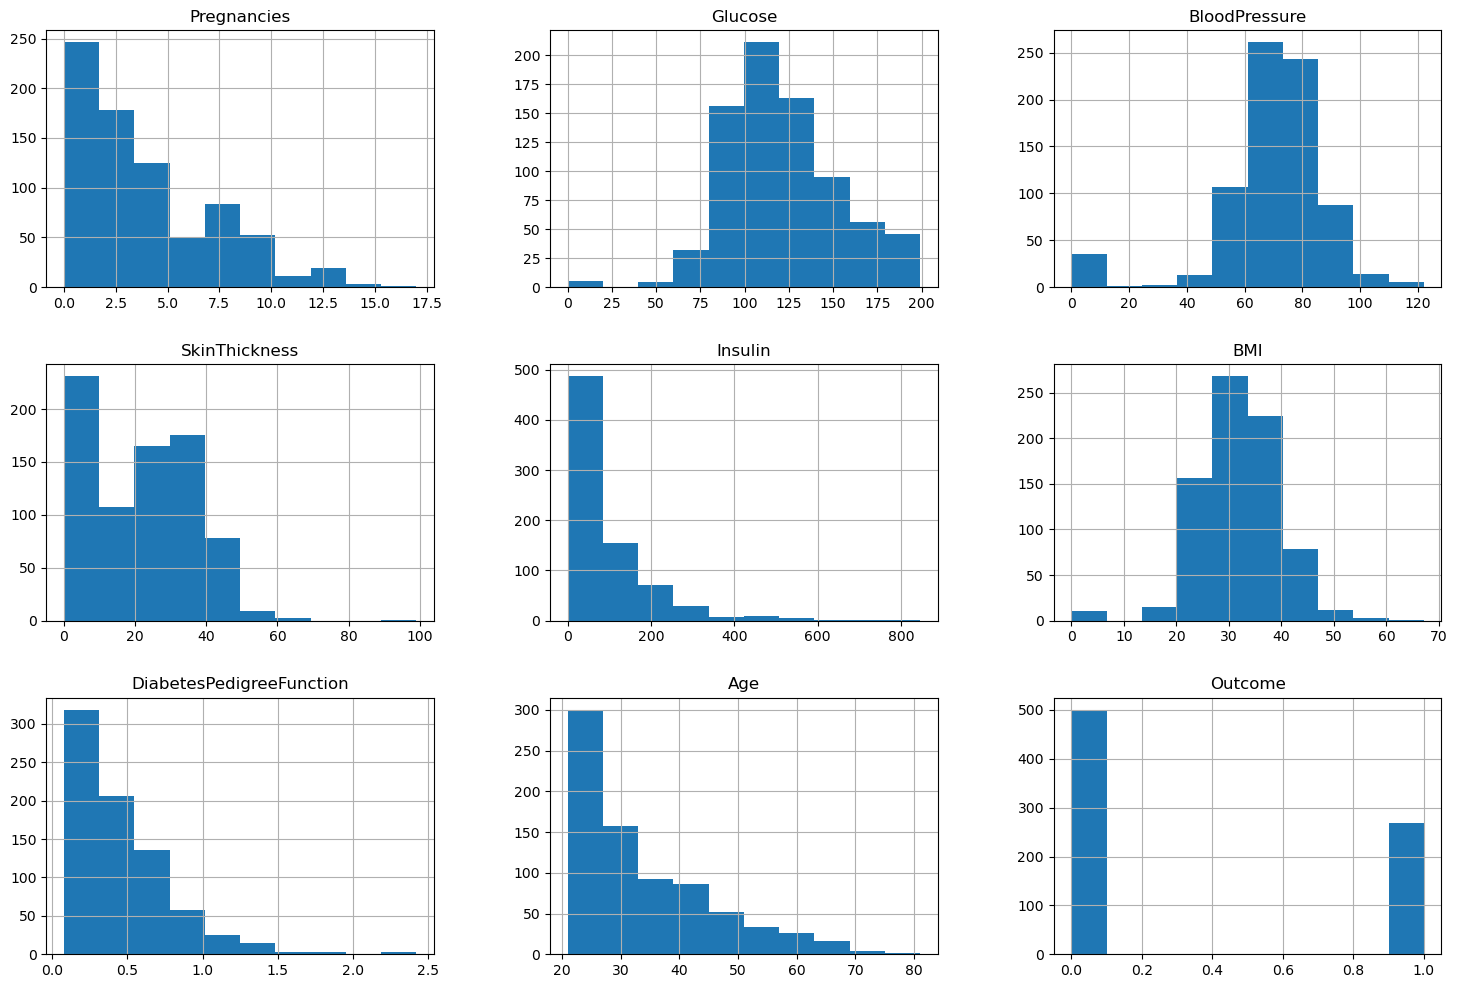

In [73]:
data.hist(figsize=(18,12))
plt.show()



<Axes: xlabel='SkinThickness'>

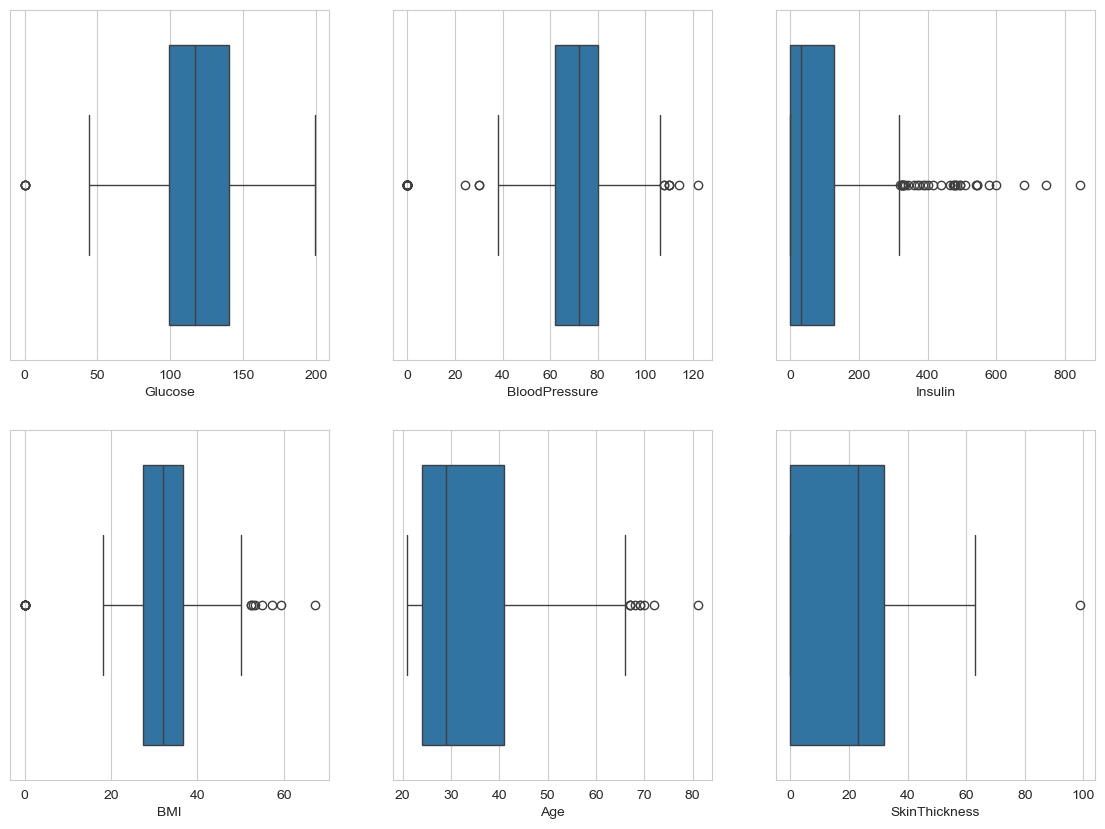

In [74]:

plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.boxplot(x='Glucose',data=data)
plt.subplot(2,3,2)
sns.boxplot(x='BloodPressure',data=data)
plt.subplot(2,3,3)
sns.boxplot(x='Insulin',data=data)
plt.subplot(2,3,4)
sns.boxplot(x='BMI',data=data)
plt.subplot(2,3,5)
sns.boxplot(x='Age',data=data)
plt.subplot(2,3,6)
sns.boxplot(x='SkinThickness',data=data)







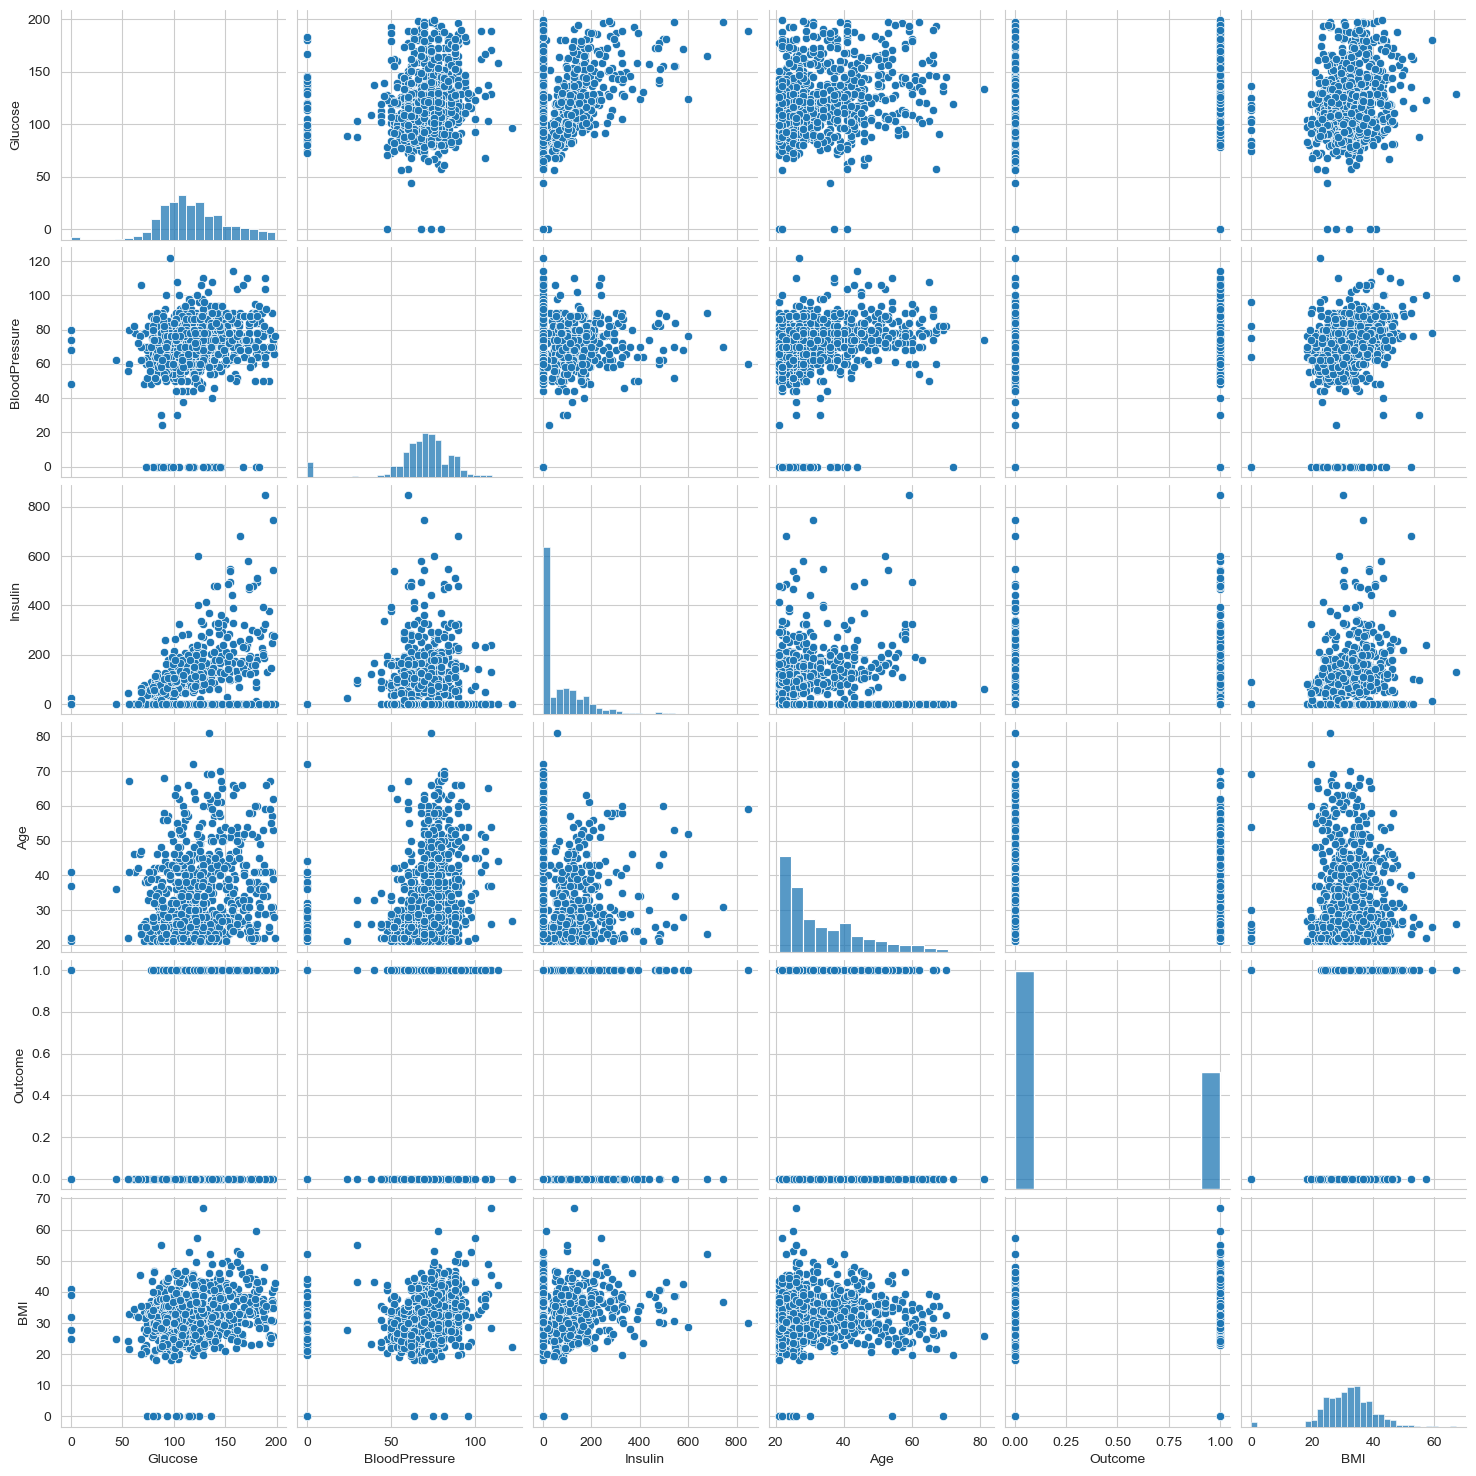

In [75]:
 
mean_col = ['Glucose','BloodPressure','Insulin','Age','Outcome','BMI']

sns.pairplot(data[mean_col],palette='Accent')


<Axes: xlabel='Outcome', ylabel='Insulin'>

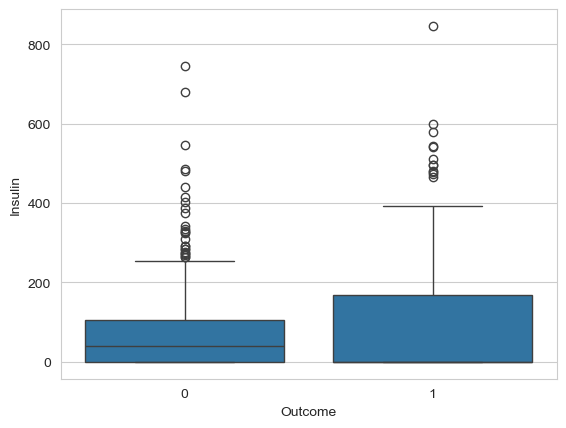

In [76]:
sns.boxplot(x='Outcome',y='Insulin',data=data)



<Axes: xlabel='BMI', ylabel='Glucose'>

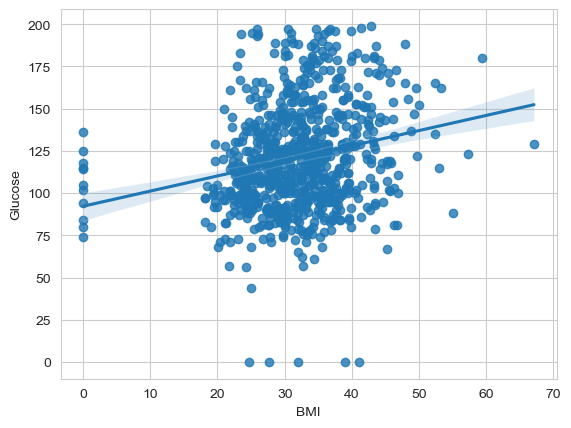

In [77]:
sns.regplot(x='BMI', y= 'Glucose', data=data)

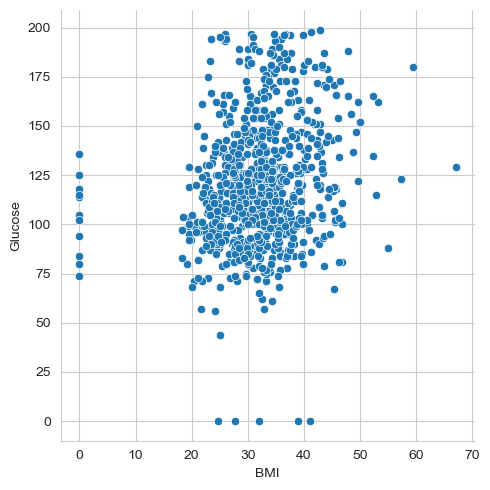

In [78]:
sns.relplot(x='BMI', y= 'Glucose', data=data)

<Axes: xlabel='Glucose', ylabel='Insulin'>

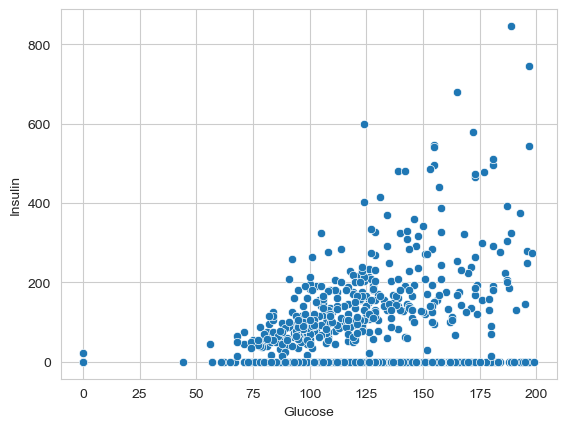

In [79]:
sns.scatterplot(x='Glucose', y= 'Insulin', data=data)

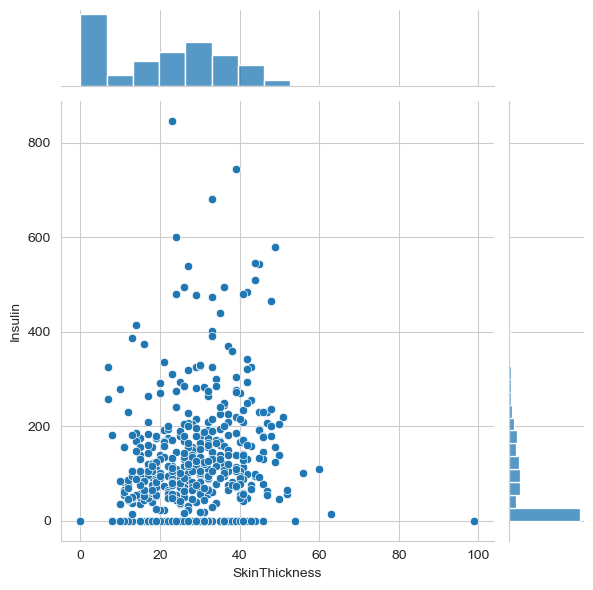

In [80]:
sns.jointplot(x='SkinThickness', y= 'Insulin', data=data)

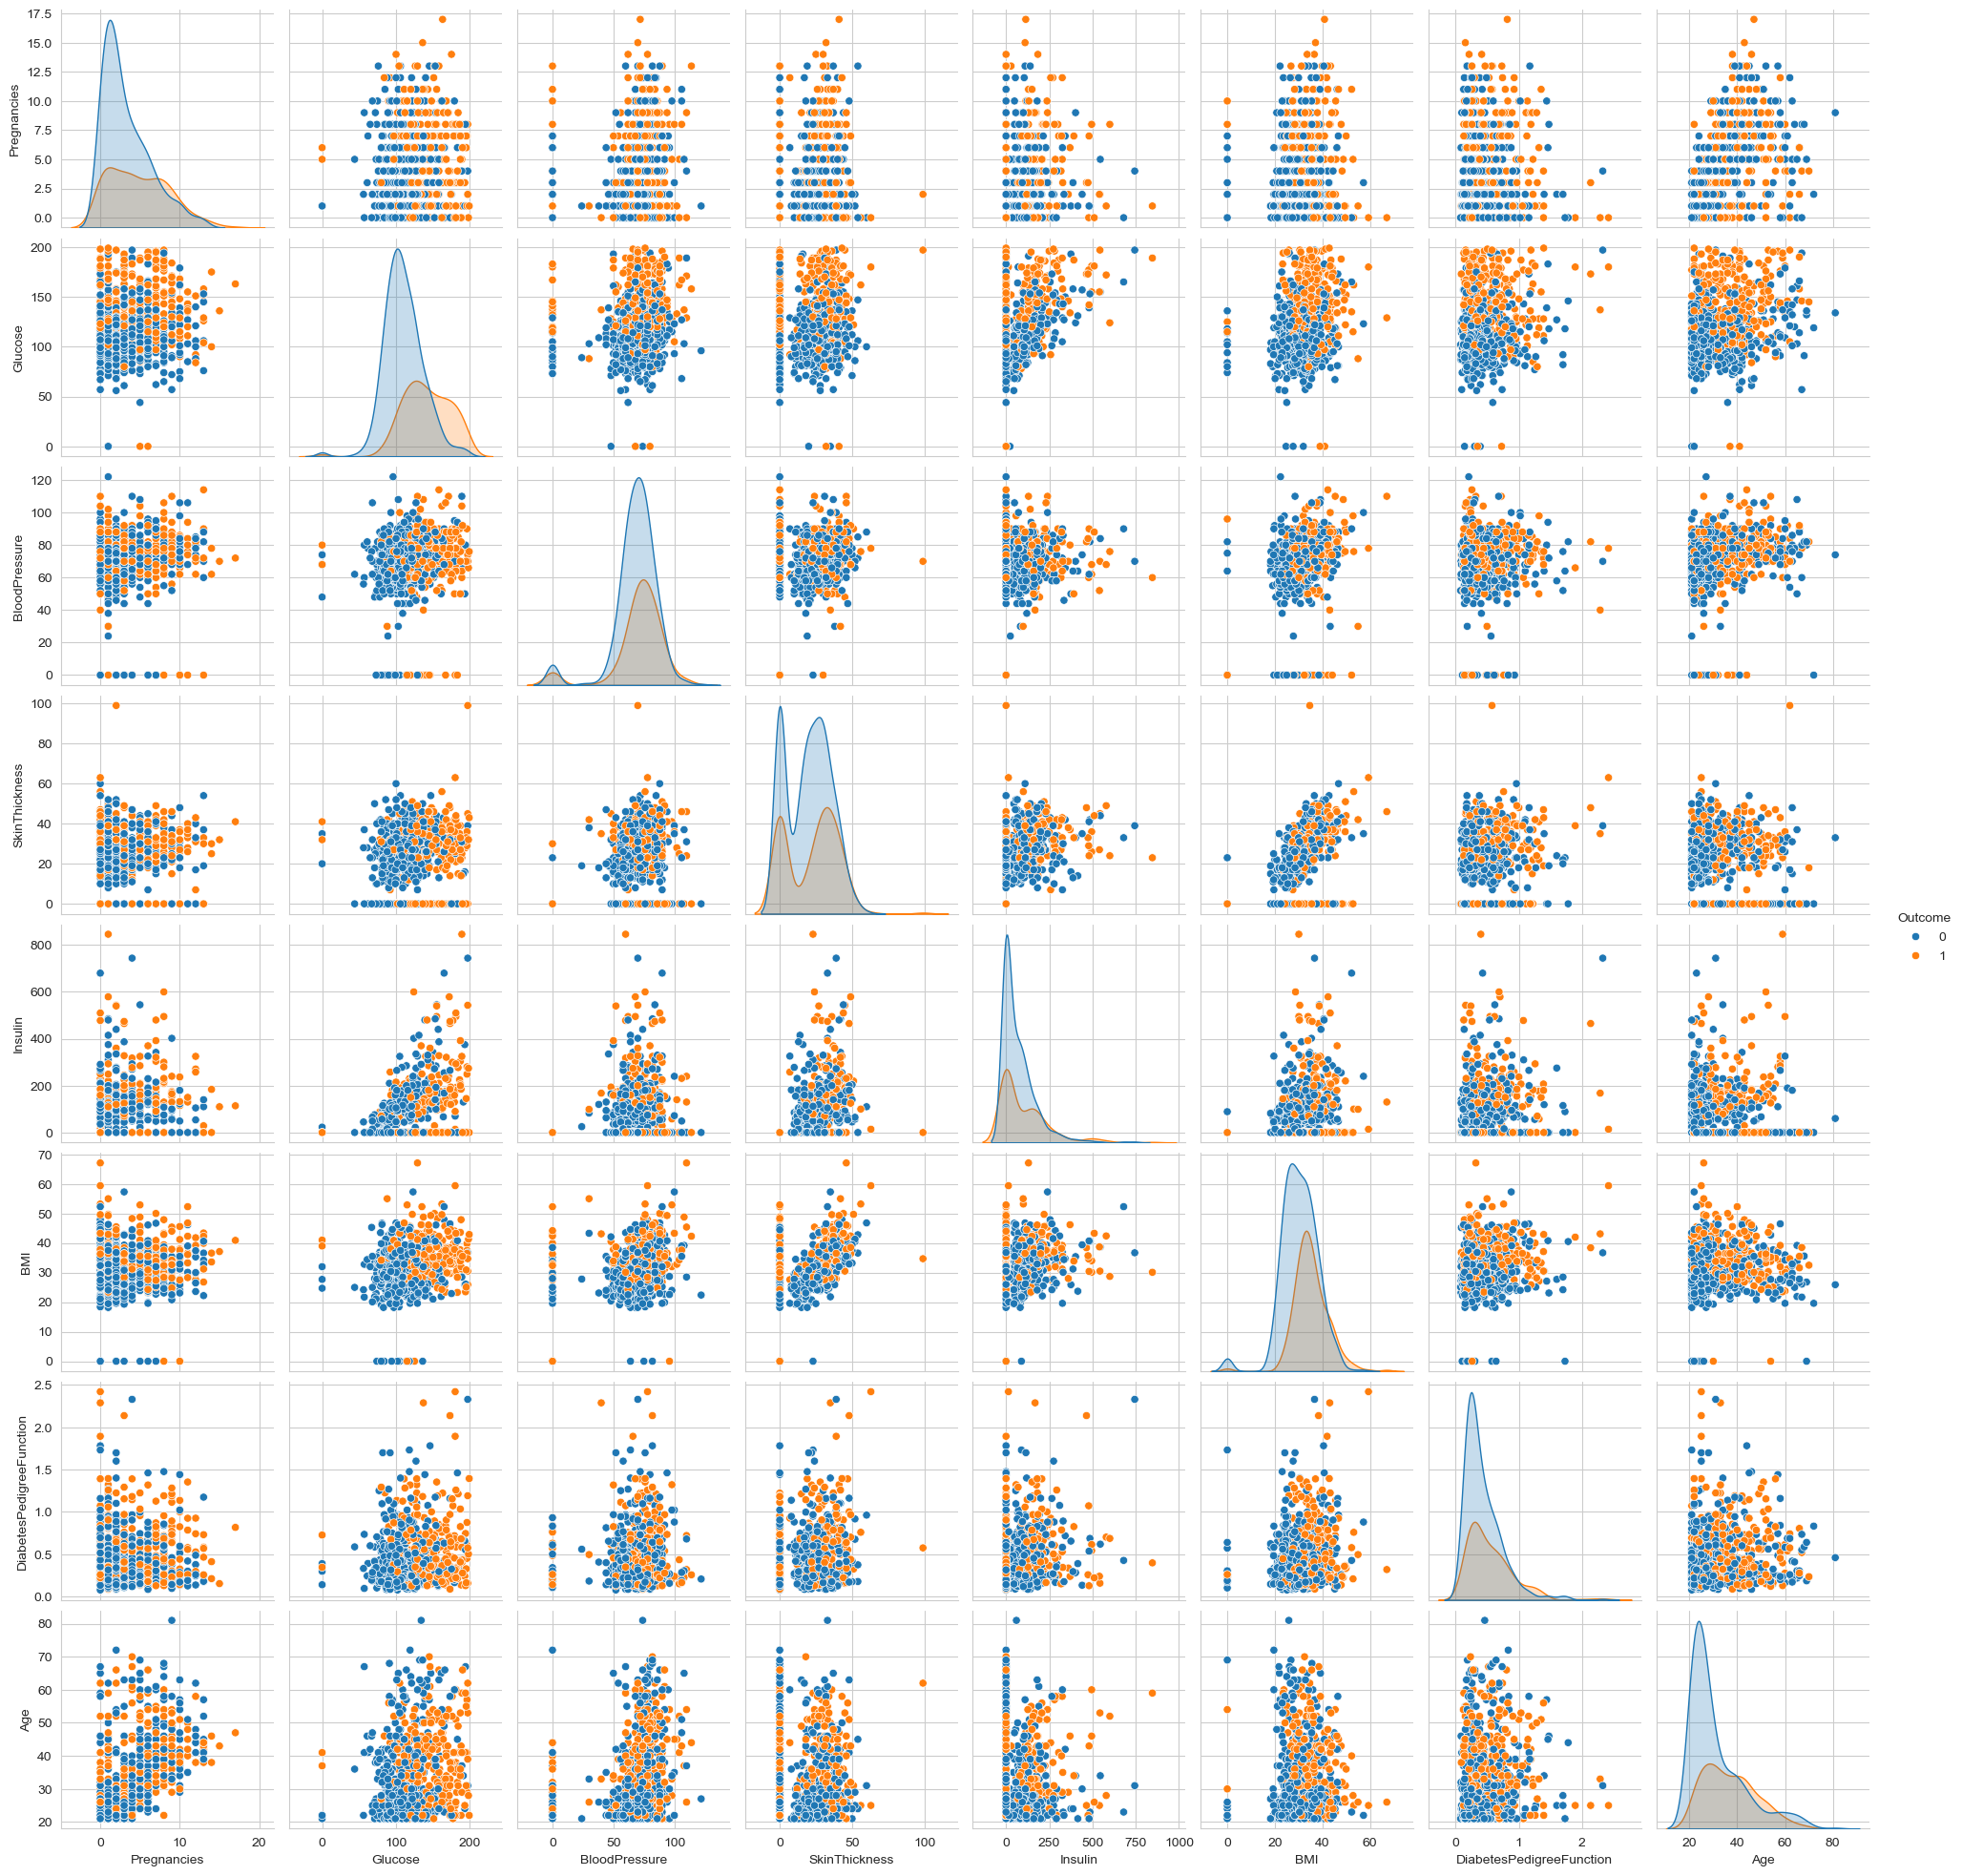

In [81]:
sns.pairplot(data,hue='Outcome')


<Axes: xlabel='Glucose', ylabel='Insulin'>

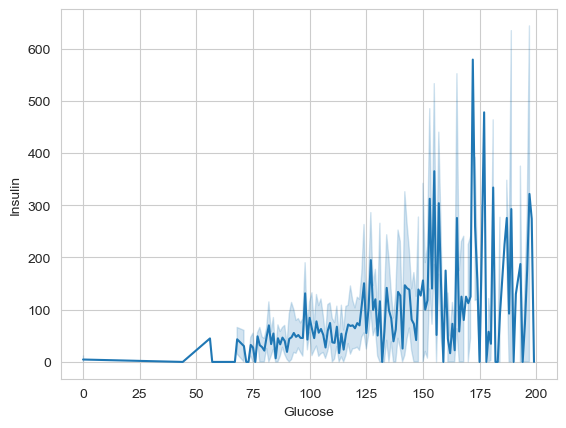

In [82]:
sns.lineplot(x='Glucose', y= 'Insulin', data=data)

<Axes: xlabel='Glucose', ylabel='Insulin'>

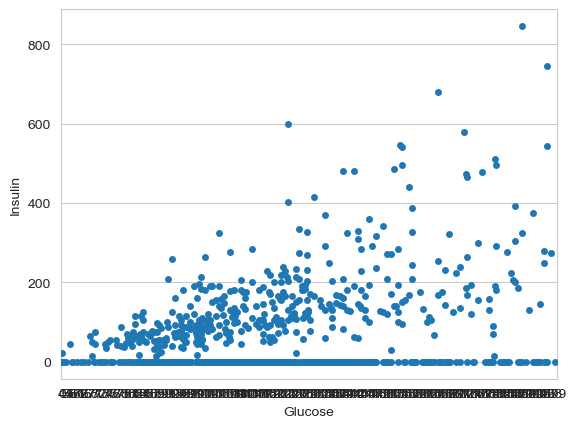

In [83]:
sns.swarmplot(x='Glucose', y= 'Insulin', data=data)

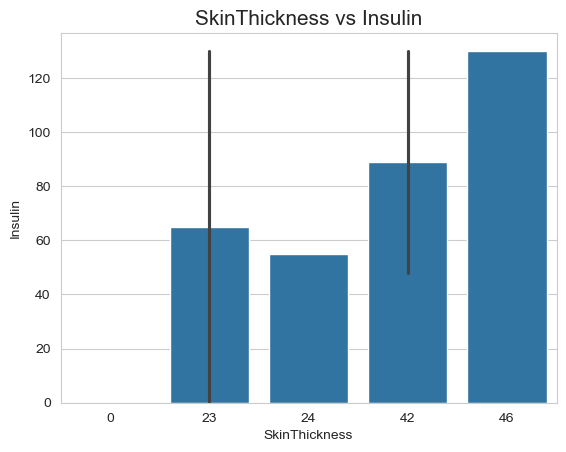

In [84]:
sns.barplot(x="SkinThickness", y="Insulin", data=data[170:180])
plt.title("SkinThickness vs Insulin",fontsize=15)
plt.xlabel("SkinThickness")
plt.ylabel("Insulin")
plt.show()
plt.style.use("ggplot")


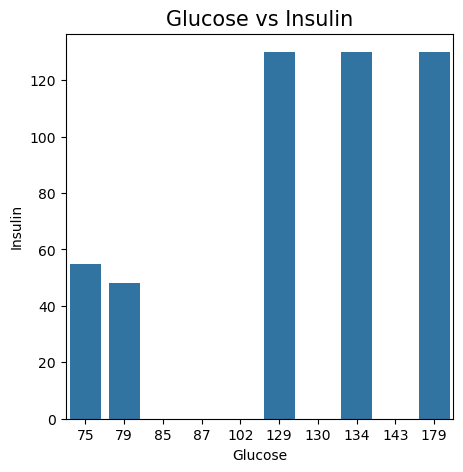

In [85]:
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="Glucose", y="Insulin", data=data[170:180])
plt.title("Glucose vs Insulin",fontsize=15)
plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.show()


In [86]:
#train_test_splitting of the dataset

x = data.drop(columns = 'Outcome')

# Getting Predicting Value
y = data['Outcome']

from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)


In [87]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))


614
154
614
154


# MODELS

# 1. Logistic Regression

In [88]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train,y_train)                         

LogisticRegression()

In [89]:
y_pred=reg.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",reg.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))


Classification Report is:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154

Confusion Matrix:
 [[98  9]
 [18 29]]
Training Score:
 77.19869706840392
Mean Squared Error:
 0.17532467532467533
R2 score is:
 0.1731954662954862


In [90]:
print(accuracy_score(y_test,y_pred)*100)

82.46753246753246


**So we get a accuracy score of 82.46 % using Logistic Regression**

# 2. KNeighborsClassifier

In [91]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)

knn.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=7)

In [92]:
y_pred=knn.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",knn.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       107
           1       0.61      0.57      0.59        47

    accuracy                           0.76       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.76      0.76      0.76       154

Confusion Matrix:
 [[90 17]
 [20 27]]
Training Score:
 78.17589576547232
Mean Squared Error:
 0.24025974025974026
R2 score is:
 -0.13302843507655582


In [93]:
print(accuracy_score(y_test,y_pred)*100)



75.97402597402598


**So we get a accuracy score of 75.97 % using KNeighborsClassifier**

# 3. SVC

In [94]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)


SVC()

In [95]:
y_pred=svc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",svc.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))


Classification Report is:
               precision    recall  f1-score   support

           0       0.81      0.92      0.86       107
           1       0.73      0.51      0.60        47

    accuracy                           0.79       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.78      0.79      0.78       154

Confusion Matrix:
 [[98  9]
 [23 24]]
Training Score:
 75.8957654723127
Mean Squared Error:
 0.2077922077922078
R2 score is:
 0.020083515609465197


In [96]:


print(accuracy_score(y_test,y_pred)*100)


79.22077922077922


**So we get a accuracy score of 79.22 % using SVC**

# 4. Naive Bayes

In [97]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)


GaussianNB()

In [98]:
y_pred=gnb.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",gnb.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))


Classification Report is:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85       107
           1       0.67      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.79      0.79      0.79       154

Confusion Matrix:
 [[93 14]
 [18 29]]
Training Score:
 75.7328990228013
Mean Squared Error:
 0.2077922077922078
R2 score is:
 0.020083515609465197


In [99]:
print("Accuracy Score:\n",gnb.score(x_train,y_train)*100)

Accuracy Score:
 75.7328990228013


**So we get a accuracy score of 75.73 % using Naiye Bayes**

# 5. DECISION TREE CLASSIFIER

In [100]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')

dtree.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=123)

In [101]:
y_pred=dtree.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",dtree.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.78      0.87      0.82       107
           1       0.59      0.43      0.49        47

    accuracy                           0.73       154
   macro avg       0.68      0.65      0.66       154
weighted avg       0.72      0.73      0.72       154

Confusion Matrix:
 [[93 14]
 [27 20]]
Training Score:
 82.08469055374593
Mean Squared Error:
 0.2662337662337662
R2 score is:
 -0.2555179956253728


In [102]:
print(accuracy_score(y_test,y_pred)*100)



73.37662337662337


**So we get accuracy score of 73.37 % using DecisionTreeClassifier**

# 6.  RandomForestClassifier

In [103]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)


RandomForestClassifier()

In [104]:
y_pred=rfc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",rfc.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))


Classification Report is:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       107
           1       0.70      0.70      0.70        47

    accuracy                           0.82       154
   macro avg       0.79      0.79      0.79       154
weighted avg       0.82      0.82      0.82       154

Confusion Matrix:
 [[93 14]
 [14 33]]
Training Score:
 100.0
Mean Squared Error:
 0.18181818181818182
R2 score is:
 0.14257307615828196


In [105]:
print(accuracy_score(y_test,y_pred)*100)

81.81818181818183


**So we get a accuracy score of 81.18 % using RandomForestClassifier**

# 7. AdaBoostClassifier

In [107]:



from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(estimator=None)  # if you want to use the default, leave estimator=None
adb.fit(x_train, y_train)


AdaBoostClassifier()

In [108]:
y_pred=adb.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",adb.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))


Classification Report is:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84       107
           1       0.63      0.66      0.65        47

    accuracy                           0.78       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.78      0.78      0.78       154

Confusion Matrix:
 [[89 18]
 [16 31]]
Training Score:
 81.75895765472313
Mean Squared Error:
 0.22077922077922077
R2 score is:
 -0.0411612646649433


In [109]:
print(accuracy_score(y_test,y_pred)*100)

77.92207792207793


**So we get a accuracy score of 77.92 % using AdaBoostClassifier**

# 8. Gradient Boosting Classifier

In [110]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)


GradientBoostingClassifier()

In [111]:
y_pred=gbc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",gbc.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.87      0.86      0.86       107
           1       0.69      0.70      0.69        47

    accuracy                           0.81       154
   macro avg       0.78      0.78      0.78       154
weighted avg       0.81      0.81      0.81       154

Confusion Matrix:
 [[92 15]
 [14 33]]
Training Score:
 91.85667752442997
Mean Squared Error:
 0.18831168831168832
R2 score is:
 0.11195068602107783


In [112]:
print(accuracy_score(y_test,y_pred)*100)

81.16883116883116


**So we get a accuracy score of 81.81 % using GradientBoostingClassifier**

# 9. XGBClassifier

In [115]:

from xgboost import XGBClassifier

xgb =XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xgb.fit(x_train, y_train)


SyntaxError: invalid syntax (3615326986.py, line 1)

In [ ]:
y_pred=xgb.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",xgb.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

In [ ]:
xbg_accuracy=print(accuracy_score(y_test,y_pred)*100)

**So we get a accuracy score of 78.57 % using XGBClassifier**

# 10. ExtraTreesClassifier

In [116]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=100, random_state=0)
etc.fit(x_train,y_train)

ExtraTreesClassifier(random_state=0)

In [117]:
y_pred=etc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",etc.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       107
           1       0.69      0.66      0.67        47

    accuracy                           0.81       154
   macro avg       0.77      0.76      0.77       154
weighted avg       0.80      0.81      0.80       154

Confusion Matrix:
 [[93 14]
 [16 31]]
Training Score:
 100.0
Mean Squared Error:
 0.19480519480519481
R2 score is:
 0.08132829588387358


In [118]:
print(accuracy_score(y_test,y_pred)*100)

80.51948051948052


 **So we get a accuracy score of 80.51 % using ExtraTreesClassifier**

In [119]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data


,Actual,Predicted
661,1,1
122,0,0
113,0,0
14,1,0
529,0,0
...,...,...
476,1,0
482,0,0
230,1,0
527,0,0


***So now we conclude the accuracy of different models:***

* Logistic Regression= 82.46 %
* KNeighbors Classifier= 75.97 %
* SVC= 79.22 %
* Naiye Bayes= 75.73 %
* Decision Tree Classifier= 73.37%
* Random Forest Classifier= 81.57%
* Ada Boost Classifier= 77.92%
* Gradient Boosting Classifier= 81.81%
* XGB Classifier= 78.57%
* Extra Trees Classifier= 80.51%





# **If you liked this notebook, please UPVOTE it.**

In [120]:
y_predict = reg.predict([[1,148,72,35,79.799,33.6,0.627,50]])
print(y_predict)
if y_predict==1:
    print("Diabetic")
else:
    print("Non Diabetic")

[1]
Diabetic


In [121]:
y_predict = knn.predict([[1,148,72,35,79.799,33.6,0.627,50]])
print(y_predict)
if y_predict==1:
    print("Diabetic")
else:
    print("Non Diabetic")

[0]
Non Diabetic


In [122]:
y_predict = svc.predict([[1,148,72,35,79.799,33.6,0.627,50]])
print(y_predict)
if y_predict==1:
    print("Diabetic")
else:
    print("Non Diabetic")

[1]
Diabetic


In [123]:
y_predict = gnb.predict([[1,148,72,35,79.799,33.6,0.627,50]])
print(y_predict)
if y_predict==1:
    print("Diabetic")
else:
    print("Non Diabetic")

[1]
Diabetic


In [124]:
y_predict = dtree.predict([[1,148,72,35,79.799,33.6,0.627,50]])
print(y_predict)
if y_predict==1:
    print("Diabetic")
else:
    print("Non Diabetic")

[1]
Diabetic


In [56]:
y_predict = rfc.predict([[1,148,72,35,79.799,33.6,0.627,50]])
print(y_predict)
if y_predict==1:
    print("Diabetic")
else:
    print("Non Diabetic")

[1]
Diabetic


In [125]:
y_predict = adb.predict([[1,148,72,35,79.799,33.6,0.627,50]])
print(y_predict)
if y_predict==1:
    print("Diabetic")
else:
    print("Non Diabetic")

[1]
Diabetic


In [126]:
y_predict = gbc.predict([[1,148,72,35,79.799,33.6,0.627,50]])
print(y_predict)
if y_predict==1:
    print("Diabetic")
else:
    print("Non Diabetic")

[1]
Diabetic
